# **TASK - 1 : TITANIC SURVIVAL PREDICTION**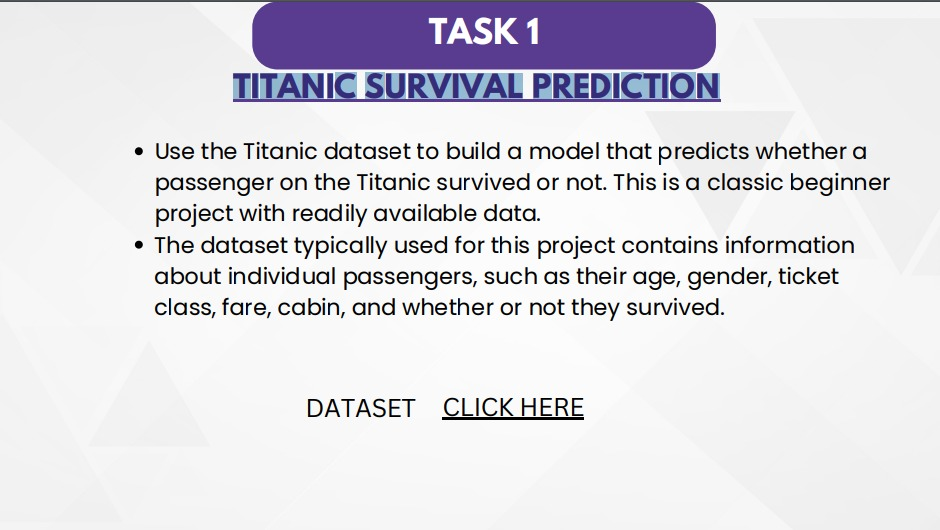

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Titanic dataset from uploaded file
df = pd.read_csv("Titanic-Dataset.csv")

# Selecting relevant features
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Name"]
target = "Survived"

df = df[features + [target]]

# Handling missing values
imputer = SimpleImputer(strategy="mean")
df["Age"] = imputer.fit_transform(df[["Age"]])

# Encoding categorical variables
label_encoder = LabelEncoder()
df["Sex"] = label_encoder.fit_transform(df["Sex"])

# Splitting the dataset
X = df.drop(columns=["Name", target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# User input for prediction
for i in range(3):  # Loop to accept three user inputs
    name = input(f"Enter passenger name {i+1}: ").strip()
    user_row = df[df["Name"].str.contains(name, case=False, na=False)]

    if not user_row.empty:
        # Ensure the user data has the same feature names as the training data
        user_data = user_row.drop(columns=["Name", target])
        user_data = user_data[X_train.columns]  # Align columns with training data
        prediction = model.predict(user_data)

        if prediction[0] == 1:
            print(f"{name} would have SURVIVED.")
        else:
            print(f"{name} would NOT have survived.")
    else:
        print("Passenger not found in the dataset.")

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

Enter passenger name 1: Braund
Braund would NOT have survived.
Enter passenger name 2: Cumings
Cumings would have SURVIVED.
Enter passenger name 3: Chandhu
Passenger not found in the dataset.


# **TASK - 2 : MOVIE RATING PREDICTION WITH PYTHON**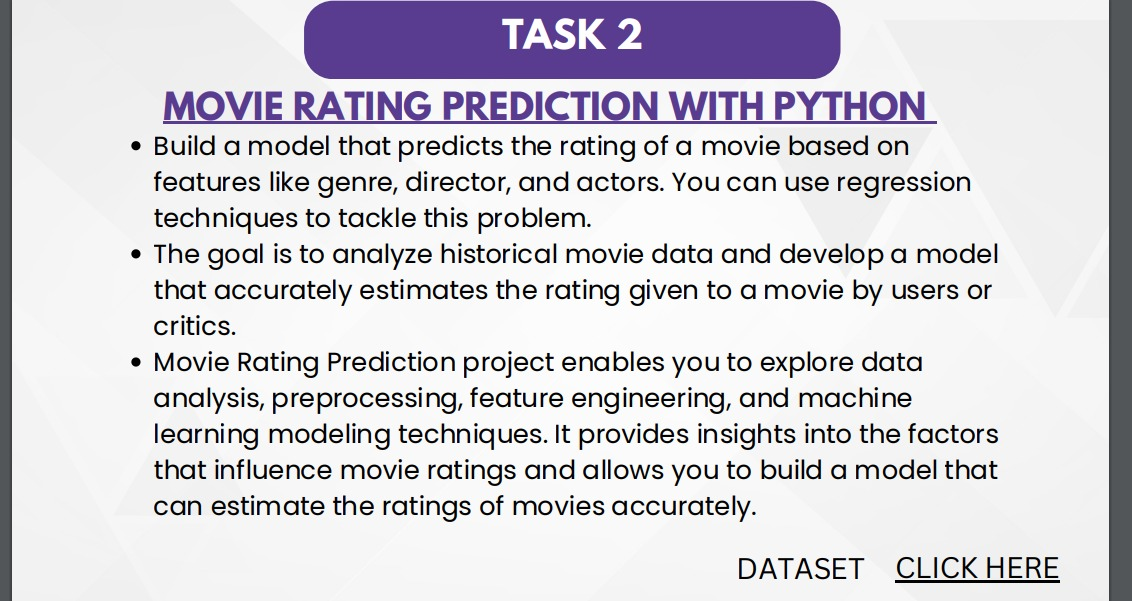

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
try:
    df = pd.read_csv("movies.csv", encoding="ISO-8859-1")
except UnicodeDecodeError:
    try:
        df = pd.read_csv("movies.csv", encoding="utf-16")
    except UnicodeDecodeError:
        df = pd.read_csv("movies.csv", encoding="cp1252")


# Selecting relevant features
features = ["Genre", "Director", "Actor 1", "Actor 2", "Actor 3"]
target = "Rating"

df = df[features + [target]].dropna()

# Encoding categorical variables
label_encoders = {}
for col in features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Splitting the dataset
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# User input for movie rating prediction
genre = input("Enter movie genre: ").strip()
director = input("Enter movie director: ").strip()
actor1 = input("Enter first actor: ").strip()
actor2 = input("Enter second actor: ").strip()
actor3 = input("Enter third actor: ").strip()

# Encoding user input
user_input = [
    label_encoders["Genre"].transform([genre])[0],
    label_encoders["Director"].transform([director])[0],
    label_encoders["Actor 1"].transform([actor1])[0],
    label_encoders["Actor 2"].transform([actor2])[0],
    label_encoders["Actor 3"].transform([actor3])[0]
]

# Convert user_input to a DataFrame with feature names
user_data = pd.DataFrame([user_input], columns=features)

# Predicting rating
predicted_rating = model.predict(user_data)[0]
print(f"Predicted movie rating: {predicted_rating:.1f}")



#USE FOLLOWING AS A USER INPUT TO TEST WHICH WAS GIVEN IN DATASET FOR TRAINING
#Drama
#Gaurav Bakshi
#Rasika Dugal
#Vivek Ghamande
#Arvind Jangid

Mean Absolute Error: 1.03
Mean Squared Error: 1.72
R² Score: 0.07
Enter movie genre: Drama
Enter movie director: Gaurav Bakshi
Enter first actor: Rasika Dugal
Enter second actor: Vivek Ghamande
Enter third actor: Arvind Jangid
Predicted movie rating: 6.2


# **Task - 3 : IRIS FLOWER CLASSIFICATION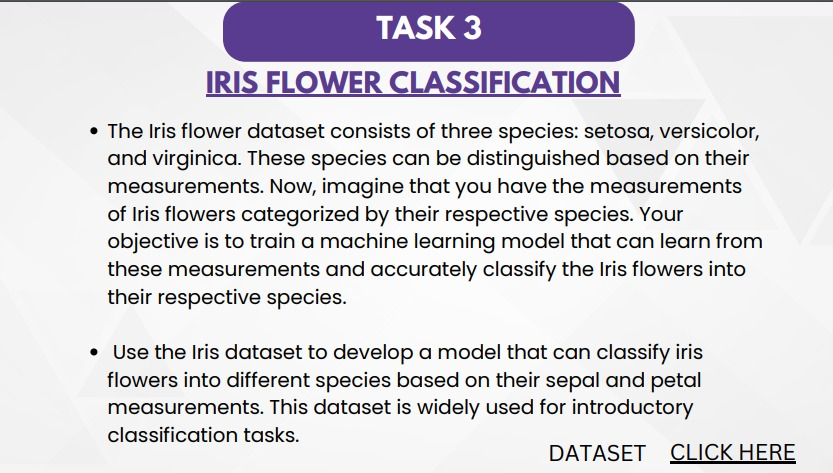**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv("IRIS.csv")
# Selecting relevant features
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"] # Corrected feature names
target = "species"

df = df[features + [target]].dropna()

# Encoding categorical variables
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Splitting the dataset
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# User input for flower classification
sepal_length = float(input("Enter sepal length: "))
sepal_width = float(input("Enter sepal width: "))
petal_length = float(input("Enter petal length: "))
petal_width = float(input("Enter petal width: "))

# Making prediction
user_input = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
# Convert user input to a DataFrame with feature names
user_data = pd.DataFrame(user_input, columns=features)

prediction = model.predict(user_data)
predicted_species = label_encoder.inverse_transform(prediction)[0]
print(f"Predicted species: {predicted_species}")



#Use following as the user input with which the training is done.
#   5.1,  3.5,  1.4,  0.2

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Enter sepal length: 5.1
Enter sepal width: 3.5
Enter petal length: 1.4
Enter petal width: 0.2
Predicted species: Iris-setosa
